In [2]:
import networkx as nx
import gzip
import pickle
import matplotlib.pyplot as plt

## 그래프 생성

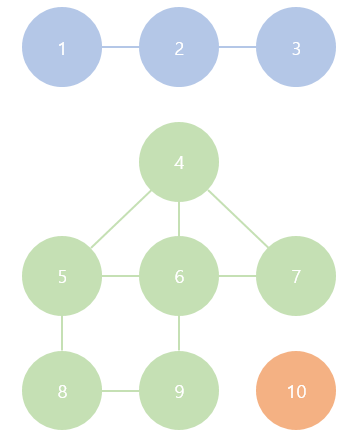

In [3]:
G = nx.Graph() #초기 graph 생성

In [4]:
G.add_nodes_from(list(range(1,11)))
G.add_edges_from([(1,2), (2,3), (4,5), (4,6), (4,7), (5,6), (5,8), (6,7),(6, 9),(8,9)])

### pyplot을 이용해서 visualization하기

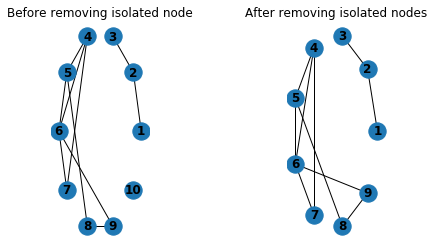

In [5]:
# isolated node 삭제하기, isolated node는 혼자 있으므로 분석이나 과제 수행에 도움이 되지 않음
plt.subplot(131, title= 'Before removing isolated node')
nx.draw_shell(G, with_labels=True, font_weight='bold')

isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)


plt.subplot(133, title= 'After removing isolated nodes')
nx.draw_shell(G, with_labels=True, font_weight='bold')

In [6]:
# Graph 저장하기
print("Saving graph file...")
with gzip.open('./data/Graph_NetworkX.gzpickle', 'wb') as dump_file:
    pickle.dump(G, dump_file)
print("Done")

# Graph 불러오기
print("Loading graph file...")
G = pickle.load(gzip.open('./data/Graph_NetworkX.gzpickle', 'rb'))
print("Done")

Saving graph file...
Done
Loading graph file...
Done


In [7]:
# Connected component 조사
# Connected component: 직/간접적으로 edge로 연결되어 있어 서로 도달 가능한 node의 집합, 즉, 서로 영향을 줄 수 있는 node set
CCs = nx.connected_components(G)

for idx, CC in enumerate(CCs):
    print(f"Connected Component {idx+1}")
    print(f"nodes: {CC}")
    print()

Connected Component 1
nodes: {1, 2, 3}

Connected Component 2
nodes: {4, 5, 6, 7, 8, 9}



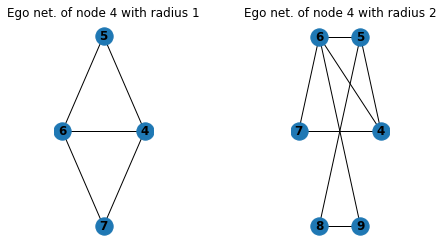

In [8]:
# ego network 조사
# ego network: graph상의 한 node를 중심으로 지정된 hop 수 (radius) 내의 이웃 node들을 포함한 graph 또는 network
ego_graph_r1 = nx.ego_graph(G, 4, radius=1)
ego_graph_r2 = nx.ego_graph(G, 4, radius=2)

plt.subplot(131, title= 'Ego net. of node 4 with radius 1')
nx.draw_shell(ego_graph_r1, with_labels=True, font_weight='bold')

plt.subplot(133, title= 'Ego net. of node 4 with radius 2')
nx.draw_shell(ego_graph_r2, with_labels=True, font_weight='bold')

### Shortest paths

In [9]:
# 두 node 사이에 path가 있는지 확인
source = 4
target = 9
if nx.has_path(G, source=source, target=target):
    p = nx.shortest_path(G, source=source, target=target) # 두 node 사이에 경로가 없으면 NetworkXNoPath error 발생
    l = nx.shortest_path_length(G, source=source, target=target)
    print(p)
    print(l)
else:
    print(f"There is no path from node {source} to node {target}")

[4, 6, 9]
2


In [10]:
# 두 node 사이에 path가 있는지 확인
source = 4
target = 9
if nx.has_path(G, source=source, target=target):
    p = nx.all_shortest_paths(G, source=source, target=target) # 두 node 사이에 경로가 없으면 NetworkXNoPath error 발생
    l = nx.shortest_path_length(G, source=source, target=target)
    print(list(p))
    print(l)
else:
    print(f"There is no path from node {source} to node {target}")

[[4, 6, 9]]
2


In [11]:
try:
    nx.average_shortest_path_length(G) #그래프 내의 모든 node 사이의 shortest path길이의 평균 반환, 연결이 안되어 있으면 불가
except nx.NetworkXError as e:
    print(e)

Graph is not connected.


In [12]:
# nx.average_shortest_path_length(G) 수행을 위해 Connected Component 단위로 실행
CCs = nx.connected_components(G)

for idx, CC in enumerate(CCs):
    subgraph = G.subgraph(CC)
    print(f"Size of Connected Component {idx+1}: \n{len(CC)}")
    print(f"Average shortest path length of Connected Component {idx+1}: \n{nx.average_shortest_path_length(subgraph):.3f}")
    print()

Size of Connected Component 1: 
3
Average shortest path length of Connected Component 1: 
1.333

Size of Connected Component 2: 
6
Average shortest path length of Connected Component 2: 
1.533



### [Gephi](https://gephi.org/)을 이용해서 visualization하기
 - Gephi: The Open Graph Viz Platform

In [13]:
# Gephi 전용 format으로 networkx graph 저장
nx.write_gexf(G, "./data/Graph_NetworkX.gexf")

### Gephi visualization 결과

- Degree에 따른 node 크기 적용과 page rank algorithm 적용 결과
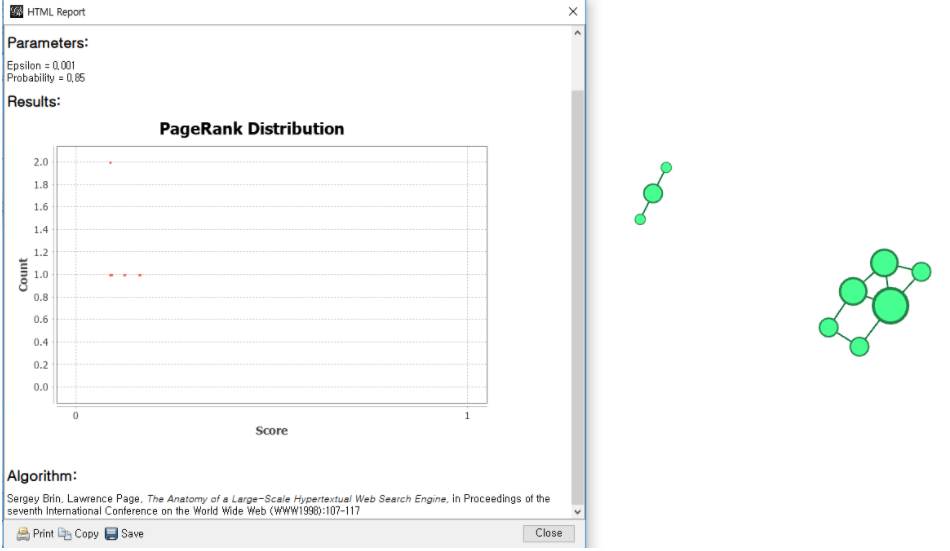